Продукт - сервис для перевода денег с любого банка в мире. В январе 2024 года в продукте добавлено обновление: возможность прикреплять сообщения к переводу.

Описание данных:

dlk_cob_date - дата всех платежей всех юзеров

user_id - идентификатор клиента

Цель: на основе когортного анализа оценить, как повлияло внедрение новой функции в продукт.

Выводы: на основании теповой карты retention проанализрованы изменение различных когорт от внедрения нового обновления, отмечен положительный эффект от внедрения обновления, однако требуется дополнительно изучить причины отсутствия изменений для старых пользователей.


In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [41]:
df = pd.read_csv("Данные.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171196 entries, 0 to 171195
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    171196 non-null  int64 
 1   dlk_cob_date  171196 non-null  object
 2   user_id       171196 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [43]:
df.head()

,Unnamed: 0,dlk_cob_date,user_id
0,0,2023-08-22,a95b0e7e-deda-4cb8-81d2-cff4a01e9077
1,1,2023-06-12,4f53a875-847f-47cb-ab16-3517ca9cf92c
2,2,2024-08-15,f04fb972-ff9c-41ce-8dbc-a0984e6017ae
3,3,2023-12-08,1d9bcb51-351d-4679-8aba-95f38b9c56e9
4,4,2024-10-15,21d807eb-1ae4-4061-a403-96b5eefdd312


In [44]:
df ['dlk_cob_date'] = pd.to_datetime(df ['dlk_cob_date'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171196 entries, 0 to 171195
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    171196 non-null  int64         
 1   dlk_cob_date  171196 non-null  datetime64[ns]
 2   user_id       171196 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ MB


In [46]:
# Извлекаем месяц и день заказа
df['date'] = df ['dlk_cob_date'].dt.to_period('D')
df['month'] = df ['dlk_cob_date'].dt.to_period('M')

In [47]:
df.head()

,Unnamed: 0,dlk_cob_date,user_id,date,month
0,0,2023-08-22,a95b0e7e-deda-4cb8-81d2-cff4a01e9077,2023-08-22,2023-08
1,1,2023-06-12,4f53a875-847f-47cb-ab16-3517ca9cf92c,2023-06-12,2023-06
2,2,2024-08-15,f04fb972-ff9c-41ce-8dbc-a0984e6017ae,2024-08-15,2024-08
3,3,2023-12-08,1d9bcb51-351d-4679-8aba-95f38b9c56e9,2023-12-08,2023-12
4,4,2024-10-15,21d807eb-1ae4-4061-a403-96b5eefdd312,2024-10-15,2024-10


In [48]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
df['cohort_day'] = df.groupby('user_id') ['date'].transform('min')
df['cohort_month'] = df.groupby('user_id')['month'].transform('min')

In [49]:
df.head()

,Unnamed: 0,dlk_cob_date,user_id,date,month,cohort_day,cohort_month
0,0,2023-08-22,a95b0e7e-deda-4cb8-81d2-cff4a01e9077,2023-08-22,2023-08,2023-03-31,2023-03
1,1,2023-06-12,4f53a875-847f-47cb-ab16-3517ca9cf92c,2023-06-12,2023-06,2023-04-04,2023-04
2,2,2024-08-15,f04fb972-ff9c-41ce-8dbc-a0984e6017ae,2024-08-15,2024-08,2023-12-04,2023-12
3,3,2023-12-08,1d9bcb51-351d-4679-8aba-95f38b9c56e9,2023-12-08,2023-12,2023-07-28,2023-07
4,4,2024-10-15,21d807eb-1ae4-4061-a403-96b5eefdd312,2024-10-15,2024-10,2023-04-10,2023-04


In [50]:
# Получаем номер месяца с первого действия
df['number_of_months'] = np.floor((df['date'] - df['cohort_day']).apply(lambda x: x.n)/30)

In [51]:
df.head()

,Unnamed: 0,dlk_cob_date,user_id,date,month,cohort_day,cohort_month,number_of_months
0,0,2023-08-22,a95b0e7e-deda-4cb8-81d2-cff4a01e9077,2023-08-22,2023-08,2023-03-31,2023-03,4.0
1,1,2023-06-12,4f53a875-847f-47cb-ab16-3517ca9cf92c,2023-06-12,2023-06,2023-04-04,2023-04,2.0
2,2,2024-08-15,f04fb972-ff9c-41ce-8dbc-a0984e6017ae,2024-08-15,2024-08,2023-12-04,2023-12,8.0
3,3,2023-12-08,1d9bcb51-351d-4679-8aba-95f38b9c56e9,2023-12-08,2023-12,2023-07-28,2023-07,4.0
4,4,2024-10-15,21d807eb-1ae4-4061-a403-96b5eefdd312,2024-10-15,2024-10,2023-04-10,2023-04,18.0


In [52]:
# Рассчитываем количество пользователей в каждой когорте по месяцам
df_cohort = df.groupby(['cohort_month', 'number_of_months'], as_index = False).user_id.nunique()

In [53]:
df_cohort.head()

,cohort_month,number_of_months,user_id
0,2023-01,0.0,162
1,2023-01,1.0,81
2,2023-01,2.0,90
3,2023-01,3.0,77
4,2023-01,4.0,69


In [54]:
# Создаем сводную таблицу для когортного анализа
df_pivot = df_cohort.pivot_table(index = 'cohort_month', columns = 'number_of_months', values = 'user_id')

In [55]:
df_pivot.head()

number_of_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-01,162.0,81.0,90.0,77.0,69.0,70.0,67.0,71.0,68.0,64.0,...,53.0,46.0,51.0,50.0,47.0,51.0,44.0,39.0,39.0,25.0
2023-02,138.0,49.0,48.0,45.0,44.0,41.0,38.0,33.0,43.0,41.0,...,42.0,35.0,39.0,37.0,30.0,33.0,35.0,27.0,17.0,NaN
2023-03,301.0,114.0,104.0,97.0,86.0,83.0,74.0,78.0,81.0,79.0,...,73.0,80.0,78.0,73.0,79.0,75.0,71.0,24.0,NaN,NaN
2023-04,591.0,213.0,178.0,179.0,172.0,169.0,178.0,146.0,137.0,135.0,...,138.0,135.0,132.0,128.0,119.0,116.0,94.0,NaN,NaN,NaN
2023-05,480.0,178.0,162.0,143.0,123.0,130.0,111.0,104.0,89.0,96.0,...,91.0,92.0,94.0,91.0,72.0,53.0,NaN,NaN,NaN,NaN


In [56]:
# Берем число зарегистрированных для расчета retention относительно этоих чисел
cohort_size = df_pivot.iloc[:, 0]

In [57]:
# Рассчитываем retention
retention_matrix = df_pivot.divide(cohort_size, axis = 0)

In [58]:
retention_matrix.head()

number_of_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
cohort_month,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,0.500000,0.555556,0.475309,0.425926,0.432099,0.413580,0.438272,0.419753,0.395062,...,0.327160,0.283951,0.314815,0.308642,0.290123,0.314815,0.271605,0.240741,0.240741,0.154321
2023-02,1.0,0.355072,0.347826,0.326087,0.318841,0.297101,0.275362,0.239130,0.311594,0.297101,...,0.304348,0.253623,0.282609,0.268116,0.217391,0.239130,0.253623,0.195652,0.123188,NaN
2023-03,1.0,0.378738,0.345515,0.322259,0.285714,0.275748,0.245847,0.259136,0.269103,0.262458,...,0.242525,0.265781,0.259136,0.242525,0.262458,0.249169,0.235880,0.079734,NaN,NaN
2023-04,1.0,0.360406,0.301184,0.302876,0.291032,0.285956,0.301184,0.247039,0.231810,0.228426,...,0.233503,0.228426,0.223350,0.216582,0.201354,0.196277,0.159052,NaN,NaN,NaN
2023-05,1.0,0.370833,0.337500,0.297917,0.256250,0.270833,0.231250,0.216667,0.185417,0.200000,...,0.189583,0.191667,0.195833,0.189583,0.150000,0.110417,NaN,NaN,NaN,NaN


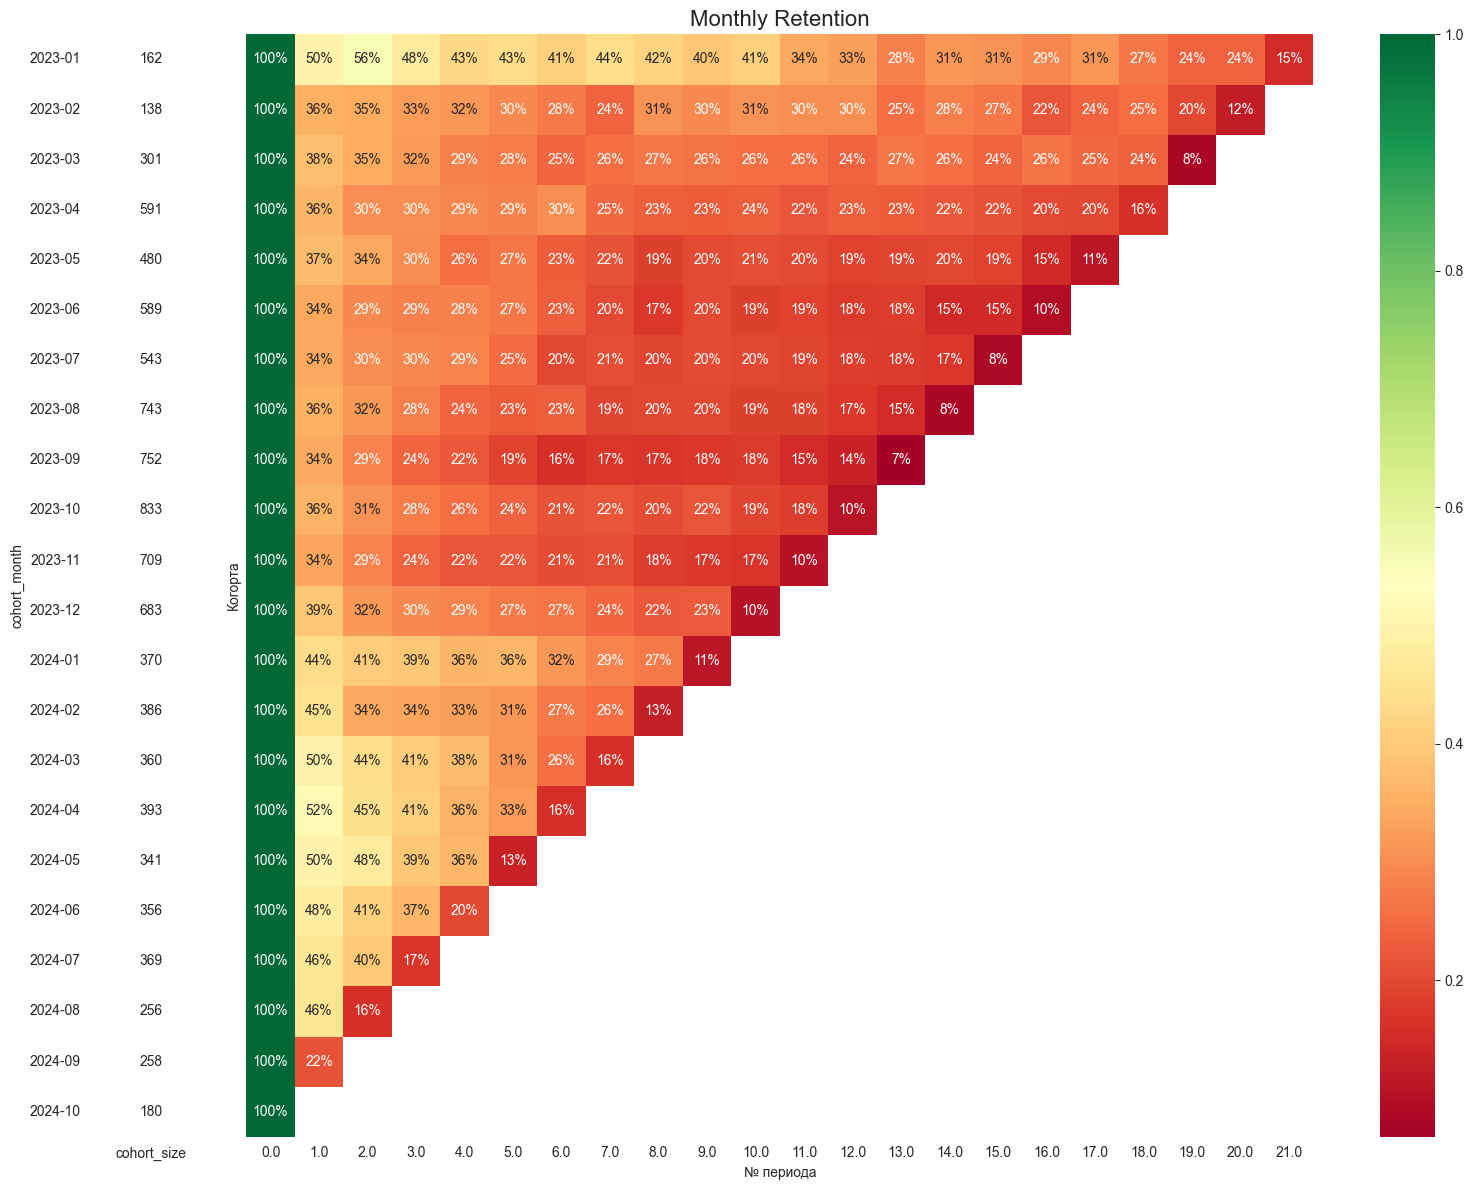

In [61]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [60]:
# причина низкого retention  в октябре связана с тем, что данные приложены не за полный месяц.
df.dlk_cob_date.max()

Timestamp('2024-10-19 00:00:00')

Вывод: на основании теповой карты retention можно отметить, что, действительно, retention  в январе 2024 увеличился относительно более ранних месяцев, более того он продолжал увеличиваться для зарегестрированных в последующих когортах, оставаясь при этом достотаточно высоким (на уровне 40%) для этих когорт и в дальнейшем. 

Однако, для старых пользователей значительных улучшений в показателя не было, а наоборот:  retention для большинства когорт не менялся и стабильно оставался на 17-20%, что может говорить о том, что пользователи, которые до внедрения фичи уже перестали пользоваться продуктом, могли не узнать об обновлении, например, по причине отсутствия рассылки об обновлении в виде уведомлений или всплывающего окна при заходе в приложение.

Таким образом, можно отметить положительный эффект от внедрения обновления, однако требуется дополнительно изучить причины отсутствия изменений для старых пользователей